**Buscar en wikipedia** [oscilador paramétrico](https://en.wikipedia.org/wiki/Parametric_oscillator)

# Global dynamics and fast indicators
## Carles Simó
## Universitat de Barcelona

Los sistemas dinámicos juegan un papel importante en la comprensión de muchos problemas en la ciencia. La variedad de dificultades que se presentan al dinámico es enorme. Los problemas locales alrededor de algún objeto bien conocido (un punto, una órbita periódica o cuasi periódica, un múltiple invariante, etc.) pueden ser estudiados por diferentes métodos. Una combinación de herramientas analíticas, geométricas y topológicas proporciona una descripción detallada de esta dinámica local y de las bifurcaciones que ocurren al cambiar parámetros. Por otro lado, se pueden estudiar más problemas globales, relacionados con una gran parte del espacio de fase o con un conjunto grande en el espacio de parámetros, utilizando métodos probabilísticos y calculando varios indicadores numéricos.

Pero puede suceder que nos gustaría combinar ambas cosas: necesitamos un conocimiento relativamente detallado de la dinámica en un conjunto grande. Con este fin, lo siguiente es útil:

- *extender el análisis local a dominios más grandes, por ejemplo utilizando formas normales hasta un orden relativamente grande, para que puedan dar buena información cuantitativa y desplegar las bifurcaciones encontradas. Este análisis proporciona una guía para los experimentos numéricos a realizar, *

- *realizar experimentos numéricos sistemáticos, tales como el cálculo de objetos invariantes: puntos fijos, órbitas periódicas, toros, etc, y, si se aplica, los colectores estables, inestables y centrales relacionados, así como las intersecciones de los colectores Homoclínicos y heteroclinicos) y las medidas cuantitativas asociadas a ellos; Y finalmente, continuar estos objetos con respecto a parámetros y detectar y analizar las bifurcaciones. Estos experimentos, a su vez, dan indicios sobre nuevos fenómenos a investigar.*

Este programa se ha llevado a cabo previamente en varios casos; Ejemplos son [3, 5, 6, 7, 12, 13, 14]. Sin embargo, ambos enfoques PUEDEN requerir esfuerzo CONSIDERABLE. Es conveniente tener indicadores rápidos que apuntan a un conocimiento significativo de la dinámica de una manera rápida (con la ayuda de matrices de procesadores). Tanto el diseño de los indicadores como la interpretación de los resultados deben guiarse por

 - *los fenómenos dinámicos conocidos de la clase considerada de sistemas, *

 - *el papel de los errores numéricos, *

 - *eficiencia computacional. *

En este trabajo bosquejamos algunas herramientas numéricas. Se presentan mostrando cómo se aplican a algunos ejemplos, donde nos limitamos a los sistemas conservadores. Pero se describen en generalidad suficiente, de modo que puedan ser utilizados en muchos otros problemas en matemáticas "experimentales".

## Un problema modelo en 1 1/2 grados de libertad

Consideremos un péndulo perturbado periódicamente con ecuación diferencial

$$x''=\left(\alpha+\beta\cos t\right)\sin x$$
--

Este problema ha recibido mucha atención porque es uno de los paradigmas más simples que muestra la mayor parte de la dinámica de su clase. Para la motivación y los resultados recientes ver [11] y, en un contexto ligeramente diferente (límite de dos péndulos acoplados) ver [9]. Algunos de los métodos presentados aquí se utilizan en [2].

Es conveniente introducir $ y = x'$. El estudio se puede realizar por medio del mapa estroboscópico $ P_{α, β}(x, y) = φ (2π, 0, x, y, α, β) $, que es un mapa de preservación de área. En lo que sigue, lo denotaremos simplemente por $ P $. Obsérvese que la variable $ x \in S^1 $, pero también es útil considerar $ x $ en la elevación (por ejemplo, para distinguir diferentes puntos fijos de $ P $). Para $ β = 0 $ las curvas invariantes de $ P $ coinciden con las órbitas de un péndulo.

Las simetrías de (15.1) implican que es suficiente considerar tanto $ α, β \geq 0 $. La dinámica es también simétrica con respecto a los ejes $ x $ y $ y $, es decir, $ P^{- 1} S_x = S_xP $, $ P^{- 1} S_y = S_y P $, donde $ S_x, S_y $ son las simetrías de reflexión con respecto a los ejes $ x $ y $ y $, respectivamente.

Está claro que para $ α, β \ll1 $ y $ y $ small tenemos un 'péndulo lento' con una perturbación periódica de tiempo rápido. En esta región el problema es adecuado para el uso de formas normales; Véase [11]. Por otro lado, para $ (α, β) $ fijo y $ y $ suficientemente grande, el ángulo rápido es $ x $ y $ t $ juega el rol lento. Algo similar sucede si $ 1 \ll β <γ α $ con $ γ $ se aleja de 1, excepto en un 'vecindario de la separatrix', donde las dos dinámicas (el péndulo congelado y la perturbación) son comparables.

## El algoritmo

Dado $ (α, β) $ buscamos el valor de $ y_{min} (x = 0) $. Debido a la simetría uno tiene $ S_y (y_{min}) = y_{min} $. Examinamos el eje $ y $ buscando $ y_{min} (x = 0) $. Para resolver la ecuación (15.1) es conveniente utilizar un método preciso y rápido y hemos adoptado un método en serie de Taylor; Ver el apéndice. 

Los pasos del algoritmo son los siguientes.

- Para un punto inicial dado $ Q_0 = (0, y_0) $, $ y_0> 0 $, procedemos a calcular iteradas bajo $ P $. Transportamos también un vector inicial 'aleatorio' (por ejemplo $ v_0 = (1, 0) $) bajo el diferencial $ DP $ por integración de las ecuaciones variacionales. De esta manera se obtienen los puntos $ Q_k = P^k (Q_0) = (x_k, y_k) $, con $ x_k ∈ [0, 2π) $ y se obtienen los vectores $ v_k = DP^k (Q_0) v_0 $, Un máximo de $ N $ iteraciones. También mantenemos un registro del valor de $ x_k $ en el ascensor $ x_k $. Sea $ \Delta k = x_k - x_{k-1} $. Calculamos los valores $ \Delta_{min} = min_{j = 1, ..., k} \Delta_j $ y $ \Delta_{max} = max_{j = 1, ..., k} \Delta_j $.

- Descartamos el valor inicial actual $ y_0 $ si $ y_k \leq 0 $. Entonces $ y_0 $ es incrementado por $ δ_{y_0} $ y el proceso comienza de nuevo.

- Si $ | v_k | > L_{max} $ para un valor fijo de $ L_{max} $ también descartamos $ y_0 $ y procedemos como antes.

- Si $ \Delta_k \leq 0 $ o $ \Delta_{max} - \Delta_{min} \geq 2π $ descartamos $ y_0 $ como antes.

- Cada $ n $ iterada ordenamos los puntos $ Q_k $, $ k = 0,. . . , mn $ para $ m ∈ \mathbb {N} $ por orden creciente de $ x_k $. Debido a la simetría también usamos las preimágenes $ Q_{- k} = (-x_k, y_k) $. Comprobamos la pendiente asociada con puntos con valores $ x $ cercanos y descartamos $ y_0 $ si la pendiente excede de $ S_{max} $ (que depende de $ (α, β) $). Se debe tener cuidado de no usar valores demasiado cercanos de $ x $ cercanos debido al efecto de errores numéricos.

- Si tres valores consecutivos (después de ordenar) de $ x $ corresponden a números de iteración $ k_1 $, $ k_2 $ y $ k_3 $, deje $ l = k_2 -k_1 $. Entonces uno debe tener $k_3 = k_3^t := k_2 +l$, a menos que $k_3^t \notin J = [−nm, nm]$ o, en el caso $k_3^t ∈ J$, si $k_3 − l \notin J$. De lo contrario descartamos $ y_0 $ y procedemos como antes.

- Un 'número de revoluciones' en $\mathbb{S}^1$ , $n(k)$, se puede asignar a cada $ Q_k $ como sigue. Sea $ n_0 = 0 $. Por $ j> 0 $ ponemos $ n (j) = n (j - 1) $ si $ x_j> x_{j -1} (en [0, 2π).) $ De lo contrario $n( j ) = n( j − 1) + 1$. De manera similar, establecemos $ n (-j) = -n (j) -1 $. Entonces es posible producir estimaciones superior e inferior del número de rotación (en $ \mathbb{S}^1 $), suponiendo Que los puntos están en un ric, como sigue. Sea $ l_j $ el número de la iteración que tiene la componente $ x $ en el $ j $ th cuando se ordena. Sea $ q_j = (n (l_{j +1}) - n (l_j)) / (l_{j +1} - l_j) ∈ \mathbb{R} $. Comience con $ ρ_{low} = 0 $, $ ρ_{upp} = 1 $ y luego actualice $ ρ_{low} $, $ ρ_{upp} $ de acuerdo con la regla: if $ l_{j +1}> l_j $ Set $ ρ_{low} = max\{ρ_{low}, q_j \} $, de lo contrario $ ρ_{upp} = min\{ρ_ {upp}, q_j\} $. Si a lo largo del cálculo de las estimaciones obtenemos $ ρ_{low}> ρ_{upp} $ entonces $ y_0 $ se descarta, como en los casos anteriores.

- Si todos los pasos anteriores se han pasado satisfactoriamente y alcanzamos la iteración $ N $ it, consideramos $ y_0 $ como un candidato para $ y_{min} (x = 0) $. Entonces podemos disminuir el valor actual de $ y_0 $ por un múltiplo de $ δ_{y_0} $ (digamos, $ Kδ_{y_0} $), disminuir el paso actual $ δ_{y_0} $ a $ δ_{y_0} / L $ Para unos $ 1 <L ∈ \mathbb{N} $ y vuelva a hacer todas las pruebas anteriores. El refinamiento se puede aplicar varias veces, pero no es conveniente comenzar con un $ δ_{y_0} $ demasiado grande. De lo contrario, podemos perder completamente las zonas con comportamiento "regular".

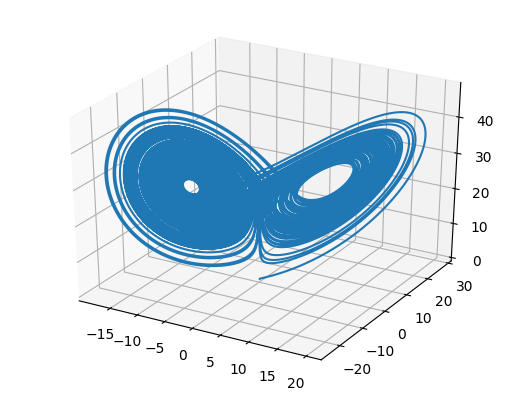

In [1]:
using ODE;
function f(t, r)
    # Extract the coordinates from the r vector
    (x, y, z) = r
    
    # The Lorenz equations
    dx_dt = sigma*(y - x)
    dy_dt = x*(rho - z) - y
    dz_dt = x*y - bet*z
    
    # Return the derivatives as a vector
    [dx_dt; dy_dt; dz_dt]
end;
# Define time vector and interval grid
const dt = 0.001
const tf = 100.0
t = 0:dt:tf

# Initial position in space
const r0 = [0.1; 0.0; 0.0]

# Constants sigma, rho and beta
const sigma = 10.0
const rho   = 28.0
const bet   = 8.0/3.0;
(t, pos) = ode45(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);
using PyPlot
plot3D(x, y, z);

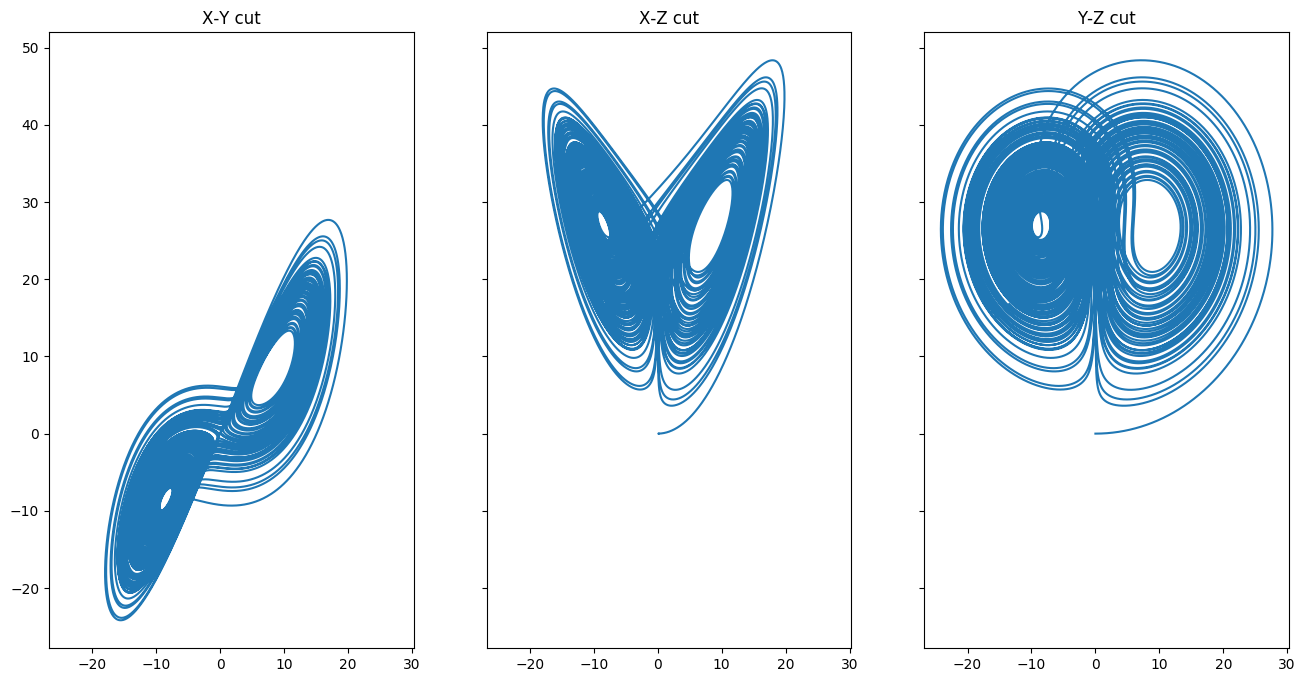

In [2]:
fig, ax = subplots(1, 3, sharex=true, sharey=true, figsize=(16,8))

ax[1][:plot](x, y)
ax[1][:set_title]("X-Y cut")

ax[2][:plot](x, z)
ax[2][:set_title]("X-Z cut")

ax[3][:plot](y, z)
ax[3][:set_title]("Y-Z cut");